In [1]:
# import the libraries
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchviz import make_dot
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# use if IProgress bar error comes
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [32]:
# generator network class
class Generator(nn.Module):
    def __init__(self,z_dim = 10, img_dim = 784 , hidden_dim = 128):
        super().__init__()
        self.linear1     = nn.Linear(z_dim,hidden_dim)
        self.batch1      = nn.BatchNorm1d(hidden_dim)

        self.linear2     = nn.Linear(hidden_dim,hidden_dim*2)
        self.batch2      = nn.BatchNorm1d(hidden_dim*2)

        self.linear3     = nn.Linear(hidden_dim*2,hidden_dim*4)
        self.batch3      = nn.BatchNorm1d(hidden_dim*4)

        self.linear4     = nn.Linear(hidden_dim*4,hidden_dim*8)
        self.batch4      = nn.BatchNorm1d(hidden_dim*8)
        
        self.output      = nn.Linear(hidden_dim*8,img_dim)
        self.activation  = nn.ReLU(inplace=True)
        self.out_act     = nn.Sigmoid()
        
    def forward(self,alpha):
        alpha = self.linear1(alpha)
        alpha = self.batch1(alpha)
        alpha = self.activation(alpha)

        alpha = self.linear2(alpha)
        alpha = self.batch2(alpha)
        alpha = self.activation(alpha)

        alpha = self.linear3(alpha)
        alpha = self.batch3(alpha)
        alpha = self.activation(alpha)

        alpha = self.linear4(alpha)
        alpha = self.batch4(alpha)
        alpha = self.activation(alpha)

        return self.out_act(self.output(alpha))


In [35]:
# discriminator network  
class Discriminator(nn.Module):
    def __init__(self, img_dim = 784 , hidden_dim = 128):
        super().__init__()
        self.linear1    = nn.Linear(img_dim,hidden_dim*4)
        self.linear2    = nn.Linear(hidden_dim*4,hidden_dim*2)
        self.linear3    = nn.Linear(hidden_dim*2,hidden_dim)
        self.output     = nn.Linear(hidden_dim,1)
        self.activation = nn.LeakyReLU(0.2)
        
    def forward(self,alpha):
        alpha = self.activation(self.linear1(alpha))
        alpha = self.activation(self.linear2(alpha))
        alpha = self.activation(self.linear3(alpha))
        return self.output(alpha)

In [36]:
# global parameters
n_epochs   = 100
noise_dim  = 64
batch_size = 128
img_dim    = 784
lr = 0.0001

In [ ]:
# load the dataset
dataloader = DataLoader(MNIST('.',download=True,transform=transforms.ToTensor()),
                       batch_size = batch_size,shuffle=True)

In [37]:
# generator and discriminator optimizers and networks
gen_network = Generator(z_dim=noise_dim).to(device)
disc_network = Discriminator().to(device)

gen_opt  = torch.optim.Adam(gen_network.parameters(),lr = lr)
disc_opt = torch.optim.Adam(disc_network.parameters(),lr = lr)

# loss function
criterion = nn.BCEWithLogitsLoss()

In [38]:
# function to print the network
temp_inp = torch.rand(batch_size,noise_dim,device=device)
y_hat = gen_network(temp_inp)
make_dot(y_hat, params=dict(list(gen_network.named_parameters()))).render("gen_torchviz1", format="png")

temp_inp = torch.rand(batch_size,img_dim,device=device)
y_hat = disc_network(temp_inp)
make_dot(y_hat, params=dict(list(disc_network.named_parameters()))).render("disc_torchviz1", format="png")

'disc_torchviz1.png'

 Current Step: 500
 Generator loss     : 5.403107841610908
 Discriminator loss : 0.19453885471075774


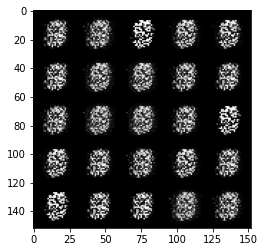

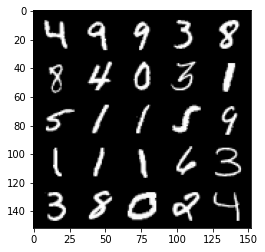

 Current Step: 1000
 Generator loss     : 5.112306307613849
 Discriminator loss : 0.12838188203051687


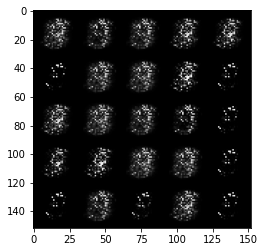

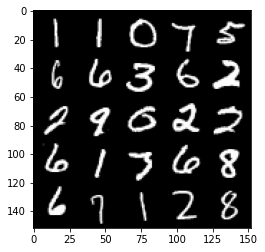

 Current Step: 1500
 Generator loss     : 4.975577426791191
 Discriminator loss : 0.1117859558891505


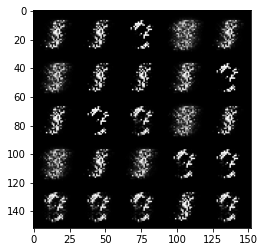

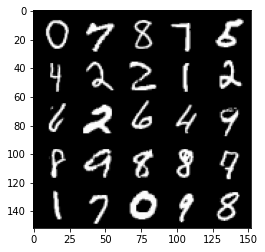

 Current Step: 2000
 Generator loss     : 5.3456540922224525
 Discriminator loss : 0.09606308291479945


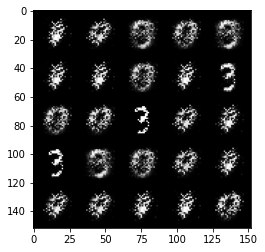

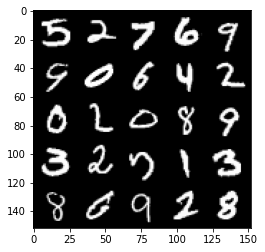

 Current Step: 2500
 Generator loss     : 5.4447177912950515
 Discriminator loss : 0.09214265904910862


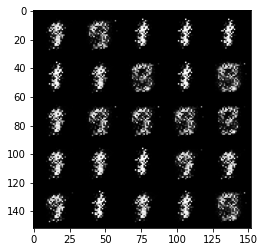

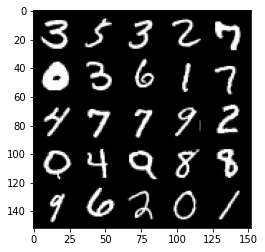

 Current Step: 3000
 Generator loss     : 5.445816848695278
 Discriminator loss : 0.08874123383779078


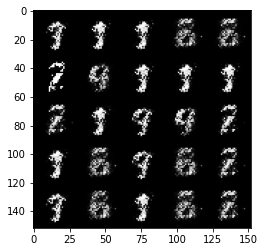

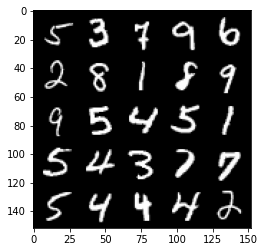

 Current Step: 3500
 Generator loss     : 5.386575022986957
 Discriminator loss : 0.0868275787213019


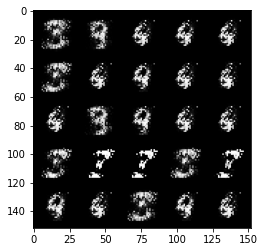

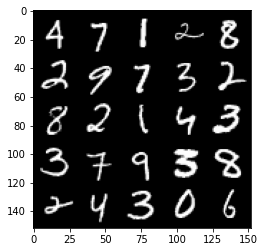

 Current Step: 4000
 Generator loss     : 5.356682438507677
 Discriminator loss : 0.08414284140302333


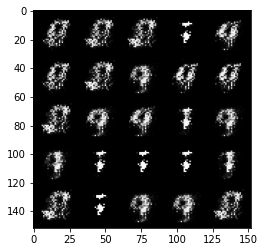

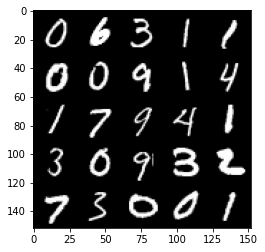

 Current Step: 4500
 Generator loss     : 5.327753915905952
 Discriminator loss : 0.08362810913649284


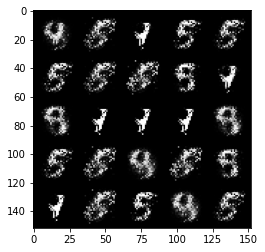

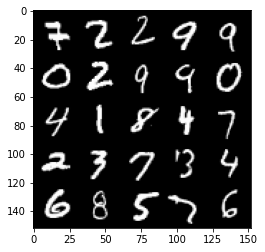

 Current Step: 5000
 Generator loss     : 5.296659958803653
 Discriminator loss : 0.08173867308665067


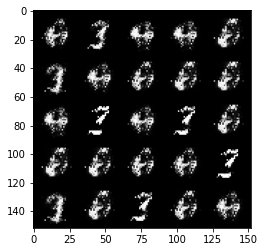

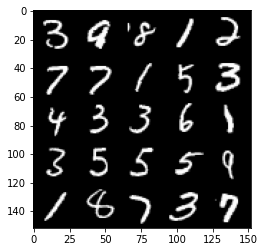

 Current Step: 5500
 Generator loss     : 5.2844062996452505
 Discriminator loss : 0.08048792116885835


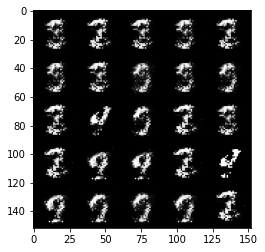

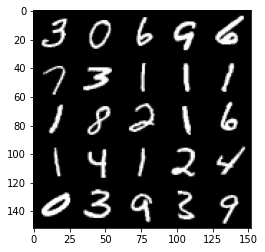

 Current Step: 6000
 Generator loss     : 5.273715360969305
 Discriminator loss : 0.07812745728724015


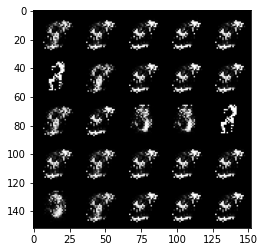

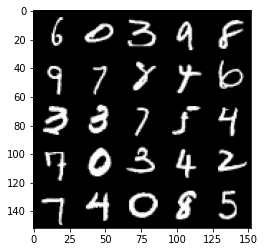

 Current Step: 6500
 Generator loss     : 5.258639510604051
 Discriminator loss : 0.0775575039780054


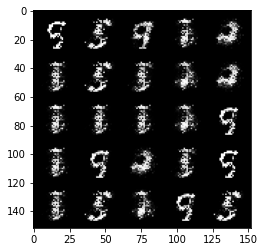

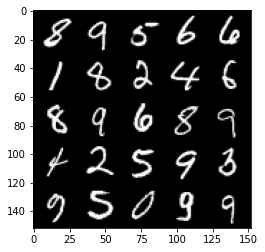

 Current Step: 7000
 Generator loss     : 5.2317595254438265
 Discriminator loss : 0.0768652064253443


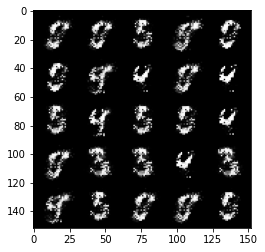

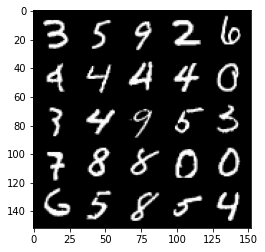

 Current Step: 7500
 Generator loss     : 5.209032678453127
 Discriminator loss : 0.07634340485595166


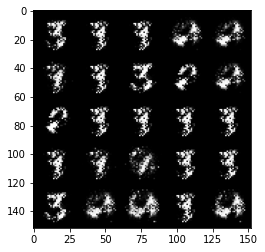

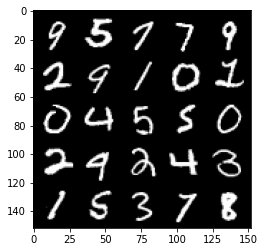

 Current Step: 8000
 Generator loss     : 5.204575687505304
 Discriminator loss : 0.07514823622780387


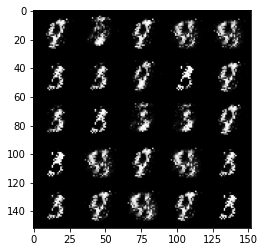

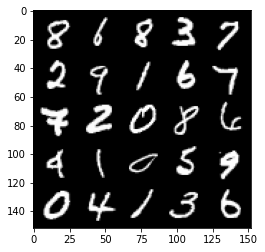

 Current Step: 8500
 Generator loss     : 5.177247107484761
 Discriminator loss : 0.074922584494795


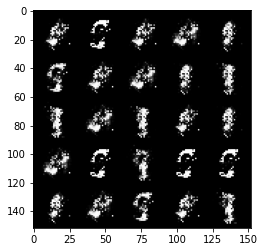

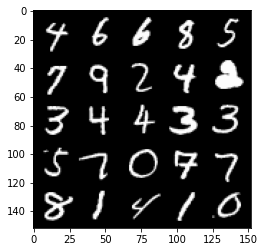

 Current Step: 9000
 Generator loss     : 5.160787526640627
 Discriminator loss : 0.07433904709558313


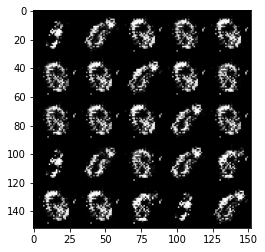

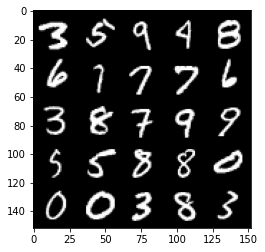

 Current Step: 9500
 Generator loss     : 5.156843803637906
 Discriminator loss : 0.07353112925103816


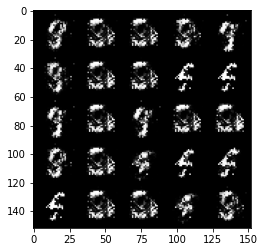

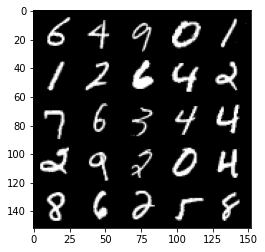

 Current Step: 10000
 Generator loss     : 5.14317861738801
 Discriminator loss : 0.07291317500453443


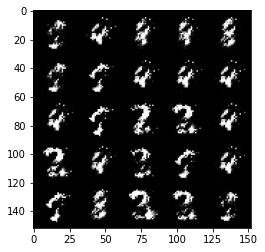

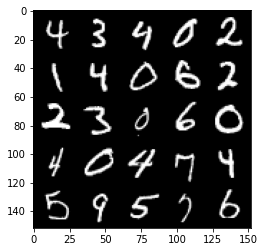

 Current Step: 10500
 Generator loss     : 5.117749914084162
 Discriminator loss : 0.07342093579231629


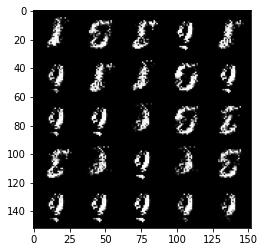

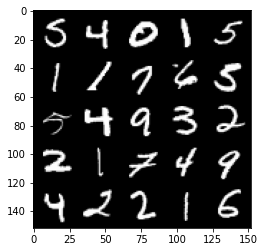

 Current Step: 11000
 Generator loss     : 5.096606713192029
 Discriminator loss : 0.07329667810350657


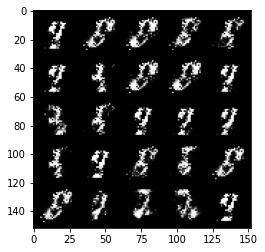

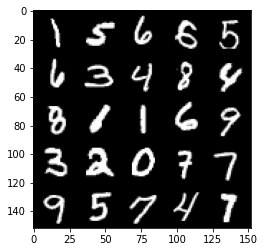

 Current Step: 11500
 Generator loss     : 5.088009972038476
 Discriminator loss : 0.07274461422123663


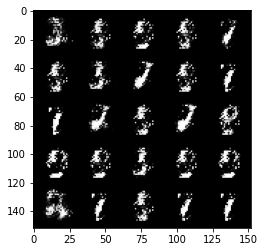

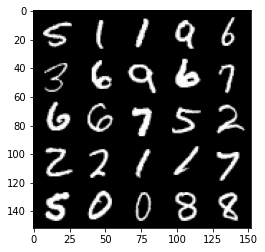

 Current Step: 12000
 Generator loss     : 5.071949464067817
 Discriminator loss : 0.07261500587306606


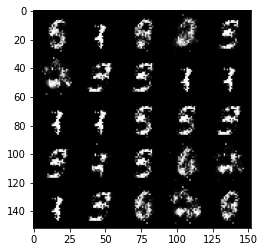

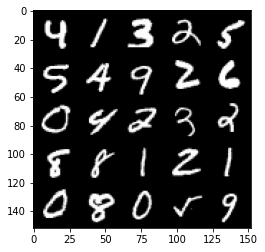

 Current Step: 12500
 Generator loss     : 5.061301045155525
 Discriminator loss : 0.07236526275835932


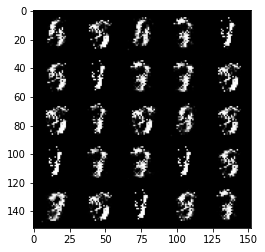

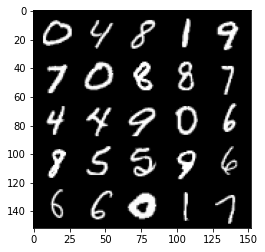

 Current Step: 13000
 Generator loss     : 5.052412926476736
 Discriminator loss : 0.0719096653093942


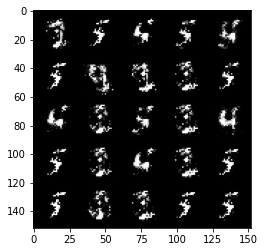

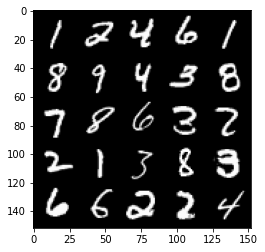

 Current Step: 13500
 Generator loss     : 5.04160914834782
 Discriminator loss : 0.07181764059693173


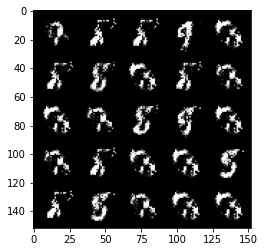

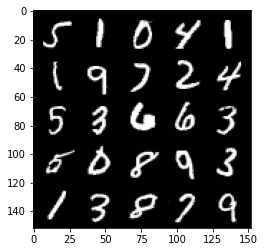

 Current Step: 14000
 Generator loss     : 5.035923727533647
 Discriminator loss : 0.07176775454111131


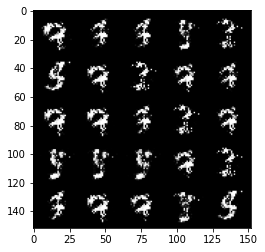

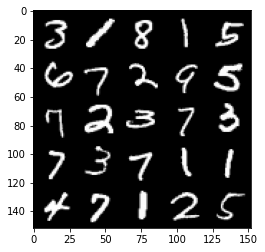

 Current Step: 14500
 Generator loss     : 5.045530272191969
 Discriminator loss : 0.07112042235233018


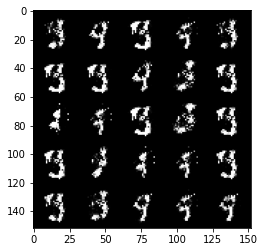

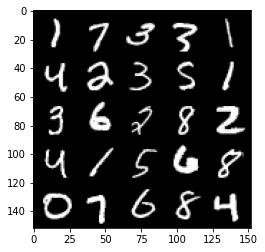

 Current Step: 15000
 Generator loss     : 5.047736485898494
 Discriminator loss : 0.07060185220881054


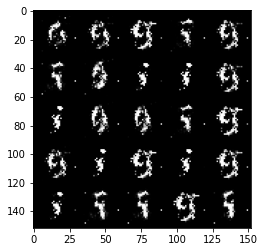

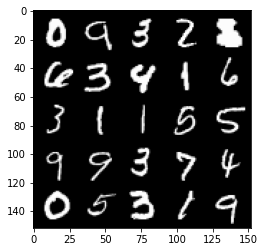

 Current Step: 15500
 Generator loss     : 5.04707957411197
 Discriminator loss : 0.07043471055880429


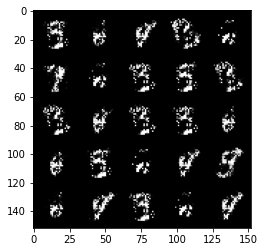

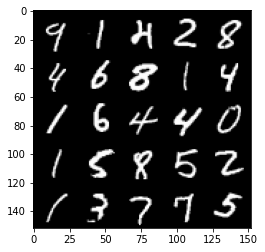

 Current Step: 16000
 Generator loss     : 5.056304841969162
 Discriminator loss : 0.06981012146212742


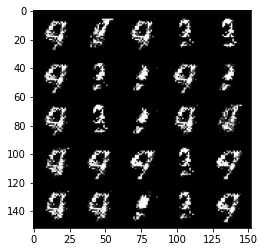

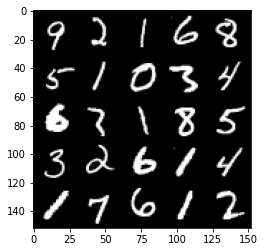

 Current Step: 16500
 Generator loss     : 5.063144386757504
 Discriminator loss : 0.0693828398281793


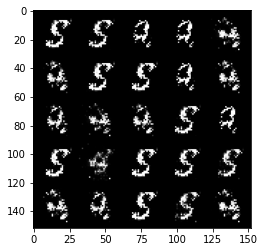

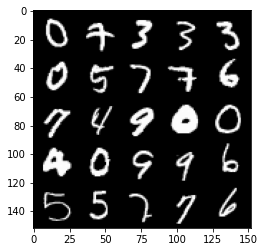

 Current Step: 17000
 Generator loss     : 5.0778962959156315
 Discriminator loss : 0.06856468206144158


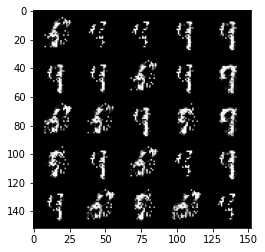

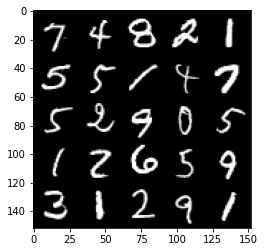

 Current Step: 17500
 Generator loss     : 5.093370979584966
 Discriminator loss : 0.06772049126924415


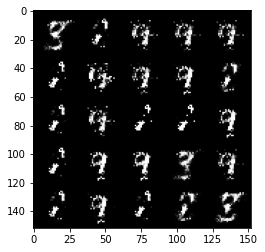

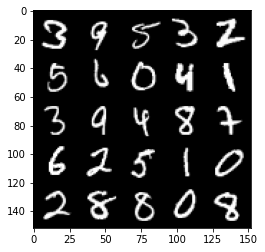

 Current Step: 18000
 Generator loss     : 5.101950501180357
 Discriminator loss : 0.0672467689287409


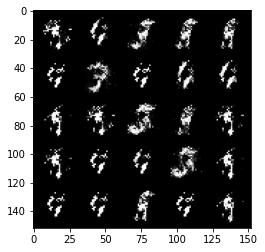

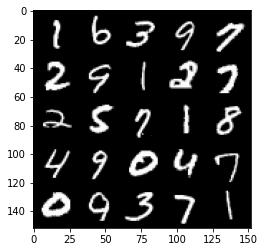

 Current Step: 18500
 Generator loss     : 5.106522001450126
 Discriminator loss : 0.06679106220156206


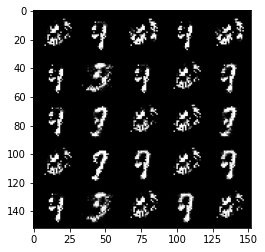

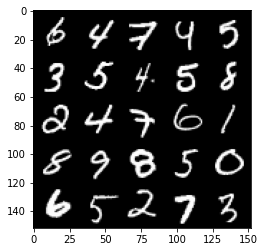

 Current Step: 19000
 Generator loss     : 5.107042129720512
 Discriminator loss : 0.06668930263191118


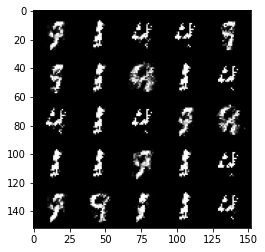

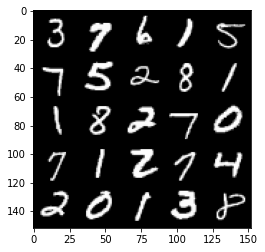

 Current Step: 19500
 Generator loss     : 5.105534941052779
 Discriminator loss : 0.06660816083491469


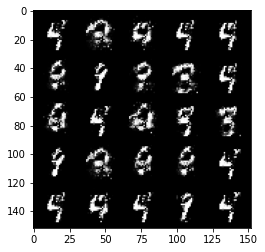

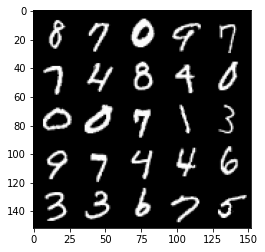

 Current Step: 20000
 Generator loss     : 5.0959475771456955
 Discriminator loss : 0.0667228365265415


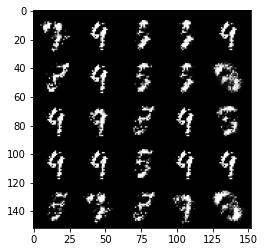

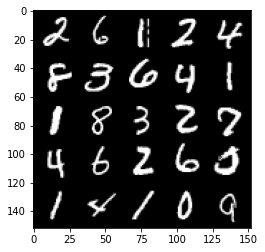

 Current Step: 20500
 Generator loss     : 5.092396509092029
 Discriminator loss : 0.0668548328671718


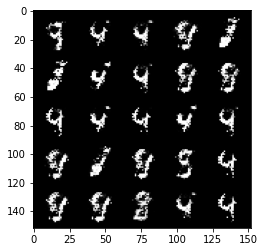

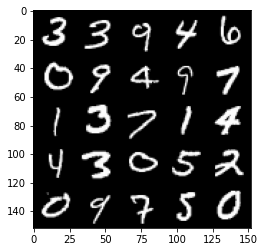

 Current Step: 21000
 Generator loss     : 5.0967761532380464
 Discriminator loss : 0.06685613093038445


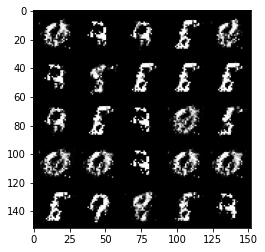

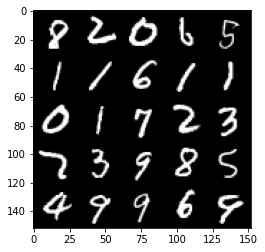

 Current Step: 21500
 Generator loss     : 5.094557692231134
 Discriminator loss : 0.06686811813895135


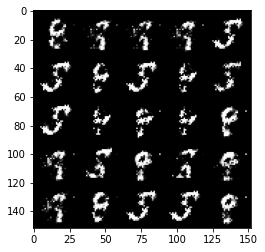

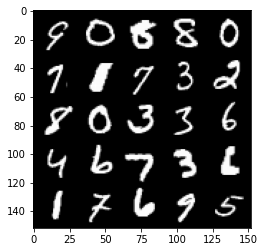

 Current Step: 22000
 Generator loss     : 5.082633884606036
 Discriminator loss : 0.06726297311612871


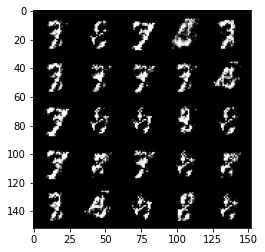

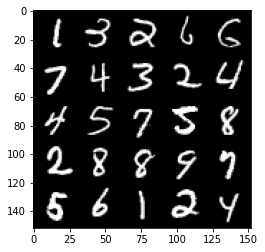

 Current Step: 22500
 Generator loss     : 5.071800585834185
 Discriminator loss : 0.06759070034301322


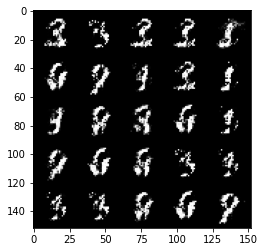

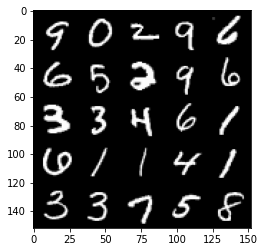

 Current Step: 23000
 Generator loss     : 5.05969667368609
 Discriminator loss : 0.06801696481864454


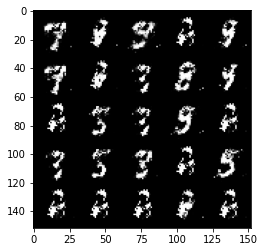

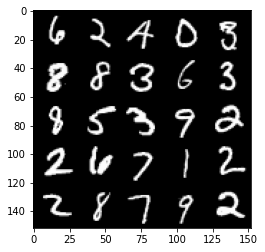

 Current Step: 23500
 Generator loss     : 5.0436387443973665
 Discriminator loss : 0.06871802610675111


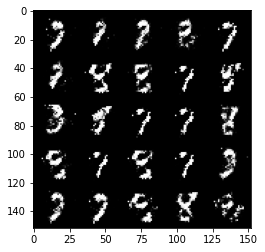

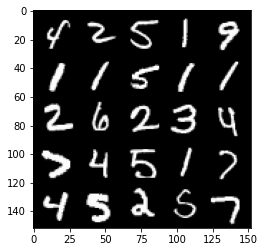

 Current Step: 24000
 Generator loss     : 5.025997790388763
 Discriminator loss : 0.06951357697176476


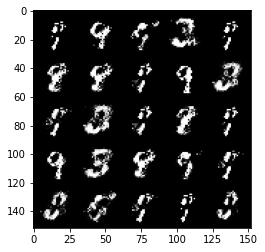

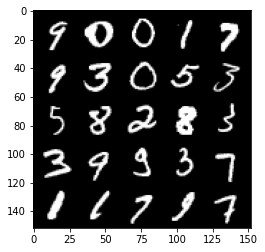

 Current Step: 24500
 Generator loss     : 5.015486677172233
 Discriminator loss : 0.06994388240242225


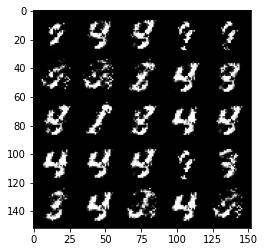

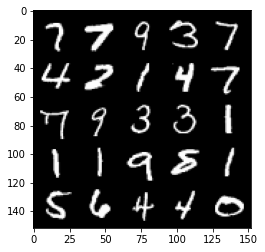

 Current Step: 25000
 Generator loss     : 5.00570321877718
 Discriminator loss : 0.07024948264592328


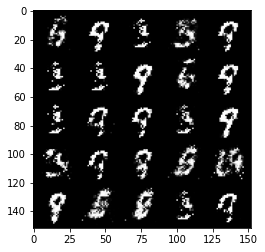

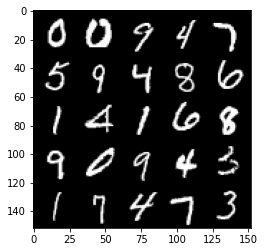

 Current Step: 25500
 Generator loss     : 4.993931293994772
 Discriminator loss : 0.07068964924656913


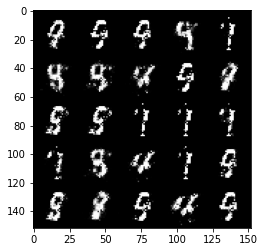

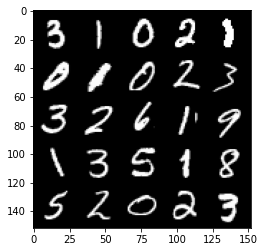

 Current Step: 26000
 Generator loss     : 4.983766877002441
 Discriminator loss : 0.07109468721119293


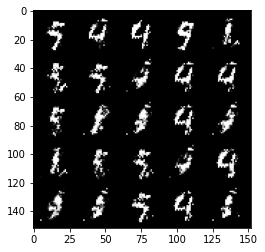

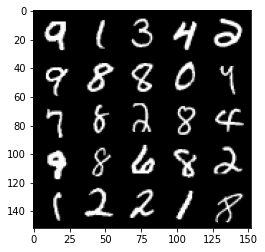

 Current Step: 26500
 Generator loss     : 4.973675035155044
 Discriminator loss : 0.07146957828857461


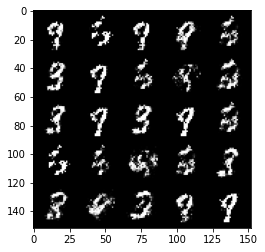

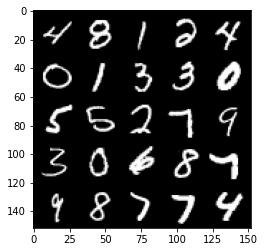

 Current Step: 27000
 Generator loss     : 4.958767061465316
 Discriminator loss : 0.07222075770527159


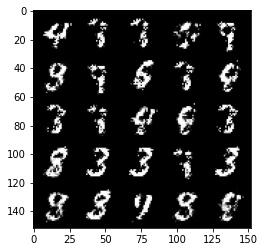

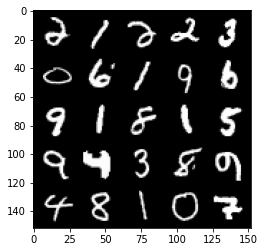

 Current Step: 27500
 Generator loss     : 4.942724942478266
 Discriminator loss : 0.07303337888237597


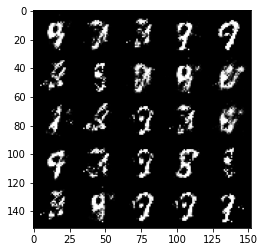

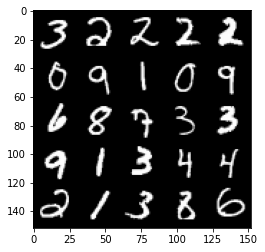

 Current Step: 28000
 Generator loss     : 4.924062505834869
 Discriminator loss : 0.07389814665548537


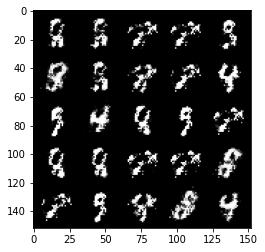

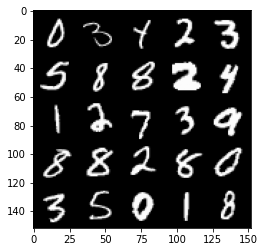

 Current Step: 28500
 Generator loss     : 4.9138772129949775
 Discriminator loss : 0.07441545202786495


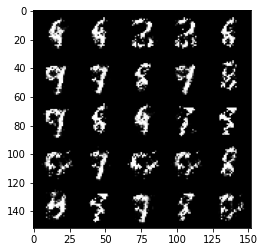

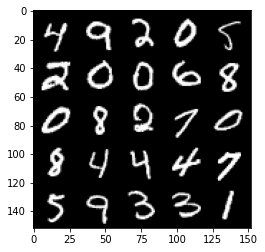

 Current Step: 29000
 Generator loss     : 4.90290875546069
 Discriminator loss : 0.0748657917523002


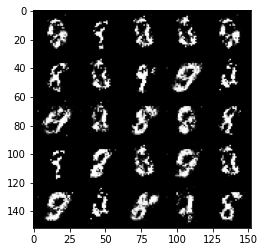

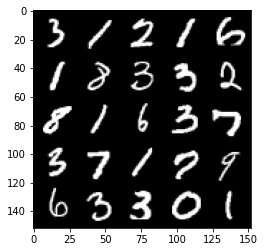

 Current Step: 29500
 Generator loss     : 4.8873213266215085
 Discriminator loss : 0.075401708961425


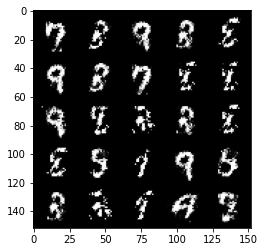

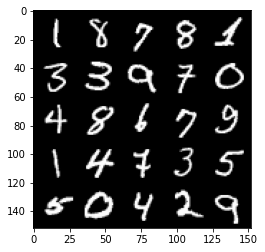

 Current Step: 30000
 Generator loss     : 4.868718434574206
 Discriminator loss : 0.07625150355113826


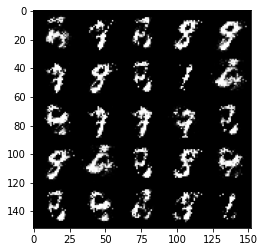

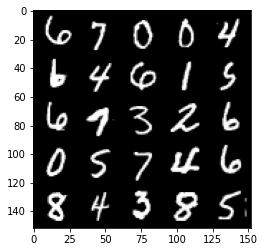

 Current Step: 30500
 Generator loss     : 4.8557612234588525
 Discriminator loss : 0.0768046629513217


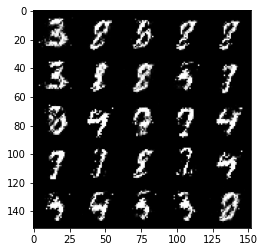

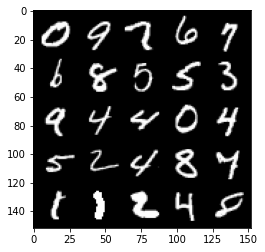

 Current Step: 31000
 Generator loss     : 4.83689311101552
 Discriminator loss : 0.07768744987778876


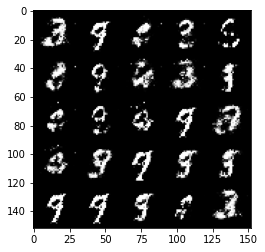

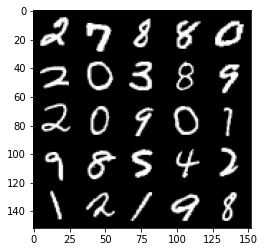

 Current Step: 31500
 Generator loss     : 4.8180626244261155
 Discriminator loss : 0.07866098111809512


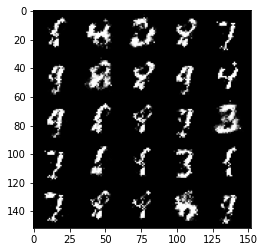

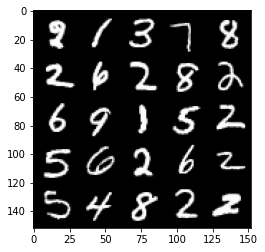

 Current Step: 32000
 Generator loss     : 4.803335081027821
 Discriminator loss : 0.07941810302541853


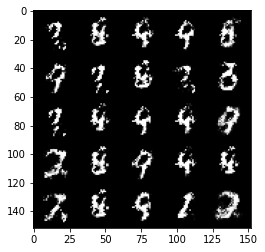

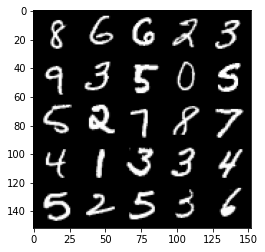

 Current Step: 32500
 Generator loss     : 4.78698918260611
 Discriminator loss : 0.08020933306836882


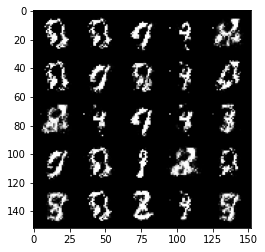

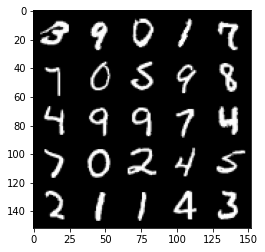

 Current Step: 33000
 Generator loss     : 4.7697709130319685
 Discriminator loss : 0.08101392796083184


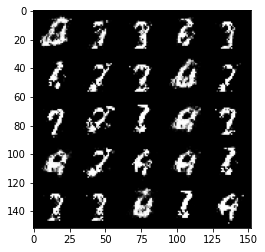

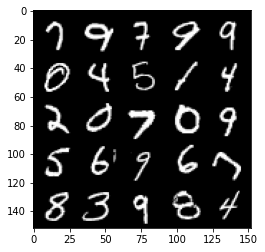

 Current Step: 33500
 Generator loss     : 4.7521718768094905
 Discriminator loss : 0.08187137676420302


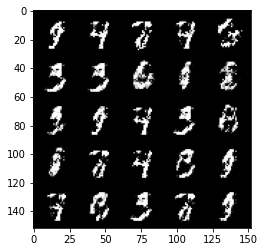

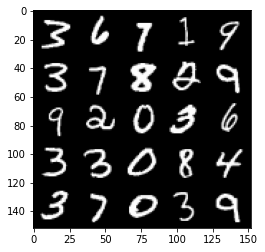

 Current Step: 34000
 Generator loss     : 4.735756017819924
 Discriminator loss : 0.08261829053830383


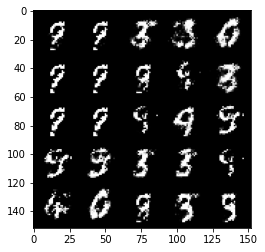

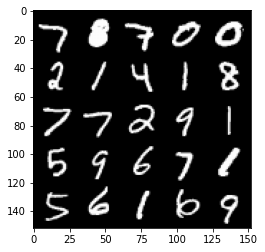

 Current Step: 34500
 Generator loss     : 4.723199668035991
 Discriminator loss : 0.08322210290251246


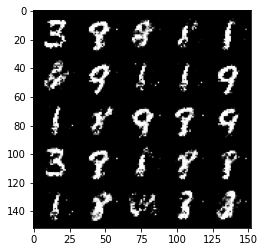

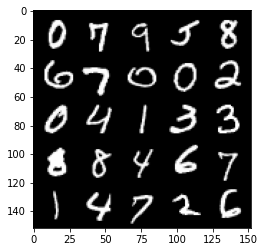

 Current Step: 35000
 Generator loss     : 4.710253157835347
 Discriminator loss : 0.08381383075533834


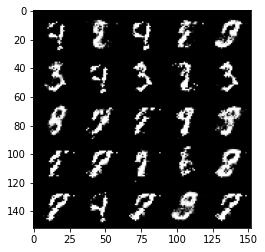

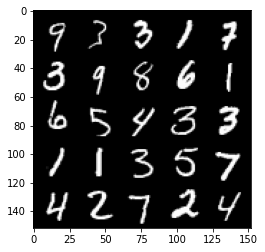

 Current Step: 35500
 Generator loss     : 4.693996605545702
 Discriminator loss : 0.08463603750459561


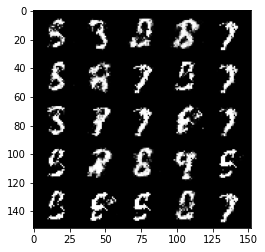

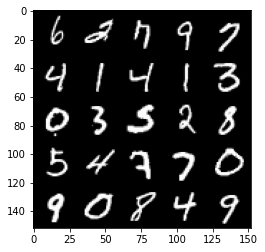

 Current Step: 36000
 Generator loss     : 4.677611723199487
 Discriminator loss : 0.08540802927212401


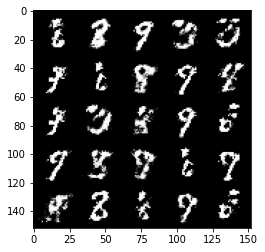

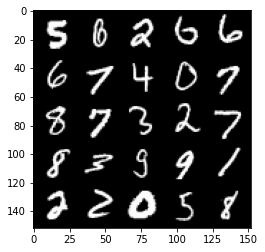

 Current Step: 36500
 Generator loss     : 4.660066602048809
 Discriminator loss : 0.08638960025899035


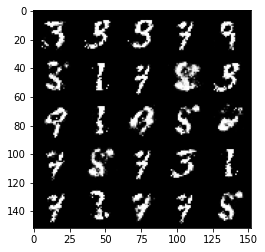

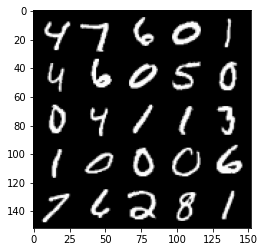

 Current Step: 37000
 Generator loss     : 4.641892538323596
 Discriminator loss : 0.08743280906170431


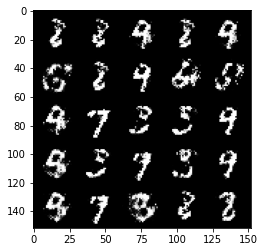

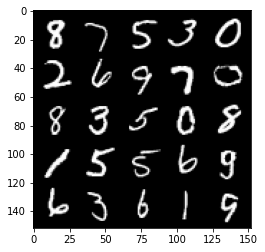

 Current Step: 37500
 Generator loss     : 4.625797514650027
 Discriminator loss : 0.08833482501149799


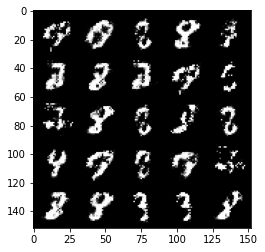

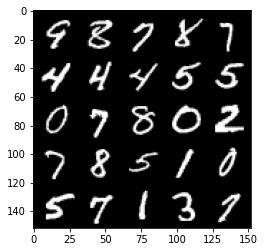

 Current Step: 38000
 Generator loss     : 4.6073931334787295
 Discriminator loss : 0.08924078911818001


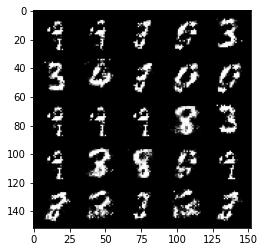

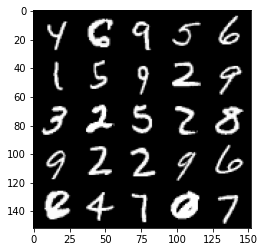

 Current Step: 38500
 Generator loss     : 4.592288948512697
 Discriminator loss : 0.09007216104788271


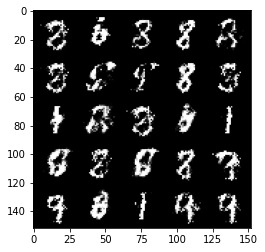

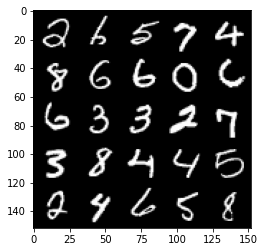

 Current Step: 39000
 Generator loss     : 4.579312006144952
 Discriminator loss : 0.09075538701707951


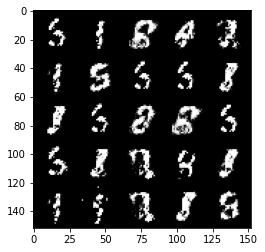

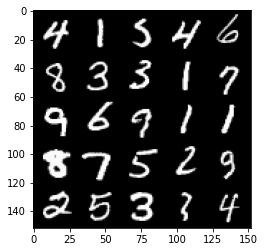

 Current Step: 39500
 Generator loss     : 4.565388137601599
 Discriminator loss : 0.09139417675128678


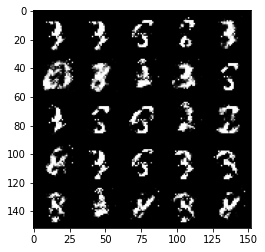

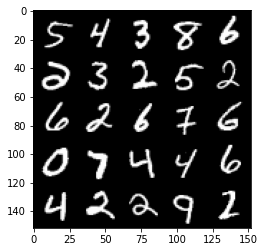

 Current Step: 40000
 Generator loss     : 4.550966426195204
 Discriminator loss : 0.09221495247716666


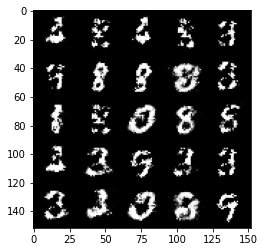

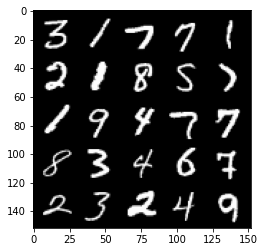

 Current Step: 40500
 Generator loss     : 4.537035774102917
 Discriminator loss : 0.09292742280515463


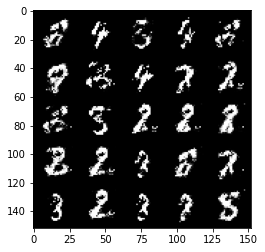

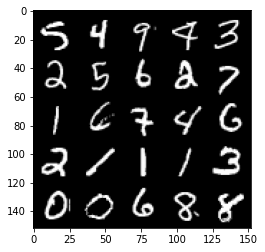

 Current Step: 41000
 Generator loss     : 4.5239870662412995
 Discriminator loss : 0.09351190151610957


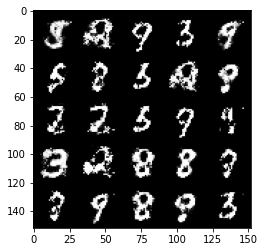

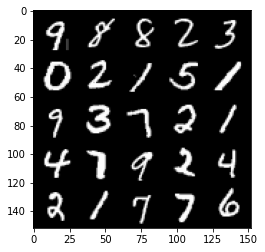

 Current Step: 41500
 Generator loss     : 4.509256361147007
 Discriminator loss : 0.09438091581064019


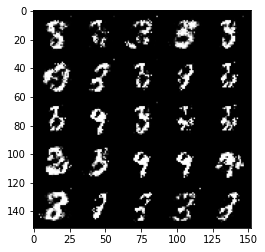

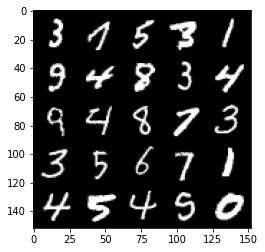

 Current Step: 42000
 Generator loss     : 4.495443064963534
 Discriminator loss : 0.0951178507195575


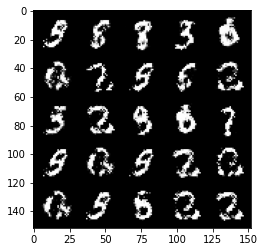

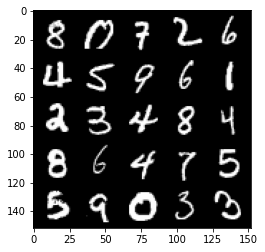

 Current Step: 42500
 Generator loss     : 4.48210820394544
 Discriminator loss : 0.0959361890523804


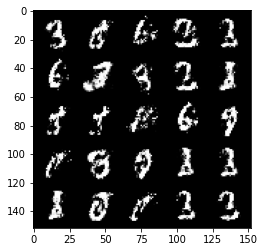

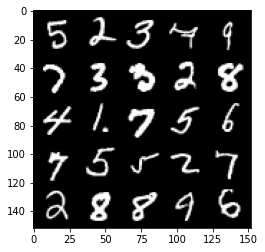

 Current Step: 43000
 Generator loss     : 4.467744405248831
 Discriminator loss : 0.09661973555412598


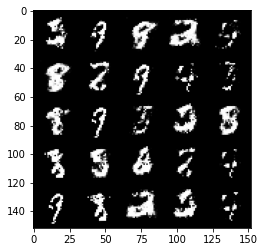

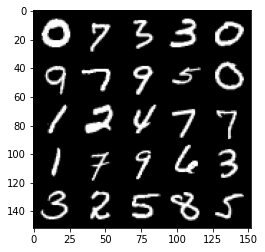

 Current Step: 43500
 Generator loss     : 4.453741345659069
 Discriminator loss : 0.09751369167993316


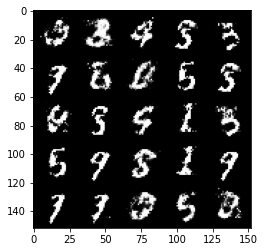

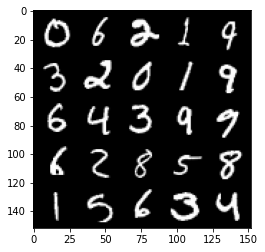

 Current Step: 44000
 Generator loss     : 4.441306422711773
 Discriminator loss : 0.09811993553024315


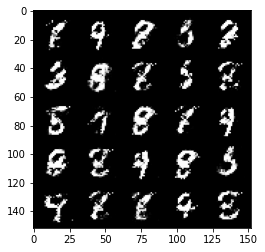

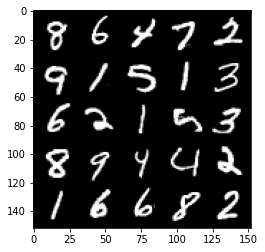

 Current Step: 44500
 Generator loss     : 4.428513347203812
 Discriminator loss : 0.09879348499813964


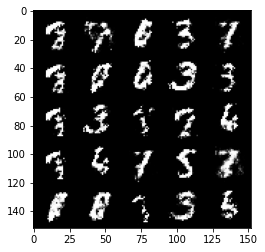

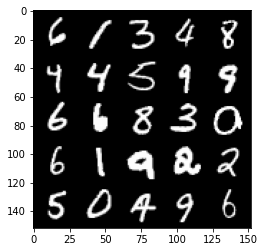

 Current Step: 45000
 Generator loss     : 4.414623454662164
 Discriminator loss : 0.09959809067936924


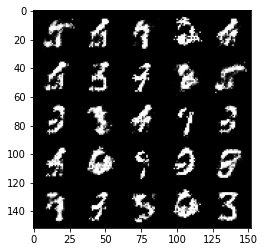

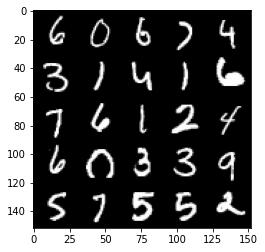

 Current Step: 45500
 Generator loss     : 4.401108665441419
 Discriminator loss : 0.10047410424078743


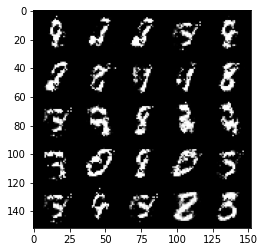

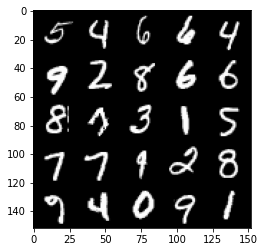

 Current Step: 46000
 Generator loss     : 4.388677628658388
 Discriminator loss : 0.10115002999447144


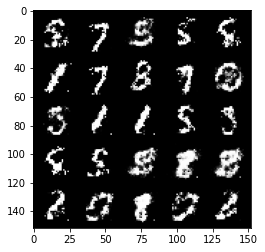

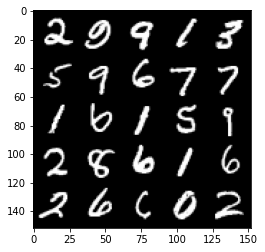

 Current Step: 46500
 Generator loss     : 4.374869982925794
 Discriminator loss : 0.10195765185380674


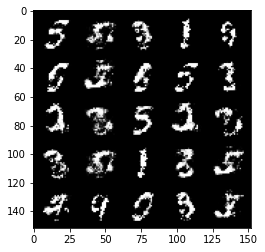

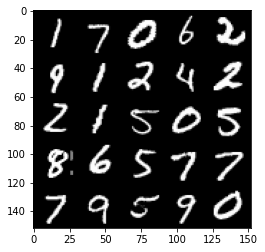

In [39]:
def disp_imgs(img_out):
    disp_img = img_out.detach().cpu().view(-1,1,28,28)
    img_grid = make_grid(disp_img[:25],nrow=5)
    plt.imshow(img_grid.permute(1,2,0).squeeze())
    plt.show()

# training loop
gen_meanloss  = 0
disc_meanloss = 0
cur_step  = 0
for epoch in range(n_epochs):
    for real_imgs,_ in dataloader:
        cur_step+=1
        cur_batch_size = len(real_imgs)
        # flattenning the images
        real_imgs = real_imgs.view(cur_batch_size,-1).to(device)
        
        # training the discriminator
        disc_opt.zero_grad()
        gen_noise  = torch.randn(cur_batch_size,noise_dim,device=device)
        gen_images = gen_network(gen_noise)
        disc_out1   = disc_network(gen_images.detach())
        disc_loss  = criterion(disc_out1,torch.zeros_like(disc_out1))
        disc_out2   = disc_network(real_imgs)
        disc_loss += criterion(disc_out2,torch.ones_like(disc_out2))
        disc_loss /= 2
        disc_loss.backward(retain_graph=True)
        disc_opt.step()
        
        # training the generator
        gen_opt.zero_grad()
        gen_noise  = torch.randn(cur_batch_size,noise_dim,device=device)
        gen_images = gen_network(gen_noise)
        disc_out   = disc_network(gen_images)
        gen_loss  = criterion(disc_out,torch.ones_like(disc_out))
        gen_loss.backward()
        gen_opt.step()
        gen_meanloss  += gen_loss.item()
        disc_meanloss += disc_loss.item()
        if cur_step%500 == 0:
            print(" Current Step: "+str(cur_step))
            print(" Generator loss     : "+str(gen_meanloss/cur_step))
            print(" Discriminator loss : "+str(disc_meanloss/cur_step))
            gen_noise  = torch.randn(cur_batch_size,noise_dim,device=device)
            img_out = gen_network(gen_noise)
            disp_imgs(img_out=img_out)
            disp_imgs(img_out=real_imgs)